# Import thư viện

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# Set matplotlib figure size
plt.rcParams['figure.figsize'] = (20, 4)

# Đọc dữ liệu

In [43]:
# Power dataframe
p_df = pd.read_csv('./data/W.csv',\
                       names=['time', 'light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker'],\
                       header=0)
# Voltage dataframe
u_df = pd.read_csv('./data/V.csv',\
                  names=['time', 'u'],\
                  header=0)
# Current dataframe
i_df = pd.read_csv('./data/A.csv',\
                  names=['time', 'light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker'],\
                  header=0)
# Power factor dataframe
pf_df = pd.read_csv('./data/cosphi.csv',\
                       names=['time', 'light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker'],\
                       header=0)

# Reactive power dataframe
q_df = pd.DataFrame()
q_df['time'] = p_df['time']
column_names = ['light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker']

# Calculate reactive power using P and cosphi
for col_name in column_names:
    q_df[col_name] = np.tan(np.arccos(pf_df[col_name])) * p_df[col_name]

light    : chiếu sáng  
socket   : ổ cắm phòng khách + bếp + ngủ  
heater   : bình nóng lạnh  
aircond1 : điều hoà 1 & 2  
aircond2 : điều hoà 3  
aircond3 : điều hoà phòng khách  
indcooker: bếp từ  

### Chọn thiết bị phân loại

In [44]:
select_device = ['heater','indcooker']

## Tính tổng P, Q, I

In [45]:
p_sum = p_df[select_device].sum(axis=1).to_numpy()
q_sum = q_df[select_device].sum(axis=1).to_numpy()
u_sum = u_df['u'].to_numpy()  # không cần tính tổng U, nhưng cứ đặt là u_sum cho đồng nhất
i_sum = i_df[select_device].sum(axis=1).to_numpy() * 100  # Nhân với 100 để I không quá nhỏ 

### Đồ thị công suất

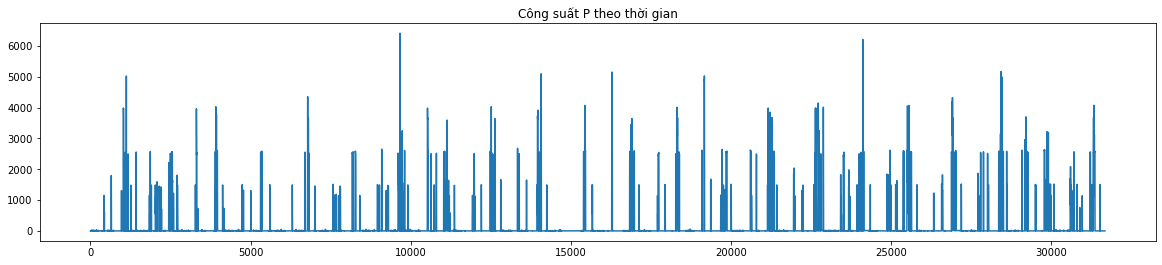

In [46]:
plt.title("Công suất P theo thời gian")
plt.plot(p_sum)

# Chuẩn bị tập dữ liệu

In [53]:
data = []
label = []
threshold = 20  # ngưỡng xác định thiết bị là bật > 20W
for t in range(1, len(p_sum)):
    data.append([u_sum[t], i_sum[t], p_sum[t], q_sum[t]])
    percent = []
    for j, device_name in enumerate(select_device):
        if p_sum[t] == 0:
            percent.append(0)
        else:
            percent.append(p_df[device_name].iloc[t] / p_sum[t])
    label.append(percent)
        
print("num data point =", len(data))

num data point = 31679


In [54]:
X = np.array(data)
y = np.array(label)
print(f'{X.shape=}')
print(f'{y.shape=}')

X.shape=(31679, 4)
y.shape=(31679, 2)


## Bảng dữ liệu đã chuẩn hoá

In [55]:
data_df = pd.DataFrame(data=X, columns=['U sum', 'I sum', 'P sum', 'Q sum'])
data_df['label'] = label
data_df

,U sum,I sum,P sum,Q sum,label
0,230.0,25.0,3.5,58.228239,"[0.0, 1.0]"
1,230.0,25.0,6.0,59.699246,"[0.0, 1.0]"
2,230.0,25.0,3.5,58.228239,"[0.0, 1.0]"
3,230.0,25.0,1.0,49.989999,"[0.0, 1.0]"
4,230.0,25.0,1.0,49.989999,"[0.0, 1.0]"
...,...,...,...,...,...
31674,230.0,25.0,1.0,49.989999,"[0.0, 1.0]"
31675,230.0,25.0,1.0,49.989999,"[0.0, 1.0]"
31676,231.0,25.0,1.0,49.989999,"[0.0, 1.0]"
31677,231.0,25.0,1.0,49.989999,"[0.0, 1.0]"


# Chia tập train, test

Tỷ lệ chia 70-30, lấy theo thứ tự, không xáo trộn (để dễ dàng so sánh kết quả với các giải thuật hoặc mô hình khác)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=False)

## Train

In [57]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(solver='adam',  
                    hidden_layer_sizes=50, 
                    random_state=1, 
                    max_iter=1000, 
                    verbose=True, 
                    learning_rate='adaptive',
                    n_iter_no_change=20)
model = clf.fit(X_train, y_train)

Iteration 1, loss = 16095192107941544486502400.00000000
Iteration 2, loss = 4662296683052173132562432.00000000
Iteration 3, loss = 7567935061503215063269376.00000000
Iteration 4, loss = 1232502336597851316944896.00000000
Iteration 5, loss = 2436782133342949496324096.00000000
Iteration 6, loss = 1408894832769630954586112.00000000
Iteration 7, loss = 681210685610355406667776.00000000
Iteration 8, loss = 309488556845031982366720.00000000
Iteration 9, loss = 261360890752348081618944.00000000
Iteration 10, loss = 315356220460530007015424.00000000
Iteration 11, loss = 341779975863964205580288.00000000
Iteration 12, loss = 439721019079859552387072.00000000
Iteration 13, loss = 638687065964087307403264.00000000
Iteration 14, loss = 1173211551098281303998464.00000000
Iteration 15, loss = 2235258655631852074696704.00000000
Iteration 16, loss = 1284922339136876119588864.00000000
Iteration 17, loss = 271659689218322582208512.00000000
Iteration 18, loss = 2284924571633922959474688.00000000
Iteratio

# Test

Độ chính xác của mô hình

In [58]:
clf.score(X_test, y_test)

-18589.677307643535

In [59]:
model.predict([X_test[0]])

array([[-4.66322264,  0.35714517]])

In [60]:
X_test[0]

array([226.        ,  25.        ,   0.5       ,  49.99749994])

In [61]:
y_test[0]

array([0., 1.])